In [1]:
# readme instructions: this notebook includes figures for the Heat exposure in informal settlements in Nairobi, Kenya

In [325]:
# Import data and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
#from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
#pd.options.display.mpl_style = 'default'
matplotlib.style.use('ggplot') # for pandas version 17
#get_ipython().magic(u'matplotlib inline')
import sys 
sys.path.append('../Bmore/')
#import ibuttonplots
#import importibuttondata
pylab.rcParams['font.family'] = 'serif' 
pylab.rcParams['font.size'] = 14
pylab.rcParams['axes.titlesize'] = 22

### Use this to read in reformated data 
tempDF = pd.read_csv('data/CleanedNairobiTemperature.csv', parse_dates = [0]).set_index('Date')
tempDF.columns = tempDF.columns.astype(int)
meta = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))
meta = meta.set_index(meta['sensornumber'])

rhDF = pd.read_csv('data/CleanedNairobiHumidity.csv', parse_dates = [0]).set_index('Date')
rhDF.columns = rhDF.columns.astype(int)

availablesensors = np.intersect1d(meta.index, tempDF.columns)
meta = meta.loc[availablesensors]
tempDF = tempDF[availablesensors]
startdate = '2015-12-03'
enddate = '2016-02-20'

In [361]:
pylab.rcParams['figure.figsize'] = 4,3

In [84]:
import scipy.stats
def prettify_plot(): 
    ""'Hides top and rightmos axis spines and also some other stuff. '""
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_axis_bgcolor('none')
    plt.grid(b=False, which='major')
# define functions used for plotting 

def easy_scatter(x,y,title, xlabel, ylabel) : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    #r = np.corrcoef(x[ind], y[ind])[0,1]
    r,p = scipy.stats.pearsonr(x[ind], y[ind])
    plt.scatter(x,y)
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r= %.2f'%r, xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p= %.2f'%p, xy=(.5, .7), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

In [359]:
# import Nairobi obs data
dictionary = {'December': '2015-12',
 'february': '2016-02',
 'january': '2016-01',
 'march': '2016-03'}
obs = pd.read_csv('data/nariboikmstemperature.csv', sep = ",") #parse_dates={'datetime':[0,1]},
obs = obs.set_index(pd.to_datetime(['%s-%s'% (dictionary[x], y) for (x, y) in zip(obs['MONTH'].values, obs['DATE'].values)]))

In [334]:
temp = tempDF*9./5.+32 #mean daily temp in fahrenheit
relh = rhDF

c1 = -42.379
c2 = 2.04901523
c3 = 10.14333127
c4 = - 0.22475541
c5 = - 0.00683783
c6 = - 0.05481717
c7 = 0.00122874
c8 = 0.00085282
c9 = - 0.00000199

hi = c1 +c2*temp +c3*relh + c4*temp*relh +c5*temp**2 +c6*relh**2+c7*temp**2*relh+c8*temp*relh**2+c9*temp**2*relh**2
hi = hi['2015-12-04':]

In [333]:
print('Wood posts: ',  (meta['attachment']=='wood').sum(), ' or ', (meta['attachment']=='wood').sum()/33.)
print('Tree: ', (meta['attachment']=='tree').sum(), ' or ', (meta['attachment']=='tree').sum()/33.)
print('Metal: ', (meta['attachment']=='metal').sum(), ' or ', (meta['attachment']=='metal').sum()/33.)


print('Sun :', (meta['sunorshade']=='sun').sum(), 'or', (meta['sunorshade']=='sun').sum()/33.)
print('Partial shade: ', (meta['sunorshade']=='partial').sum(), ' or ', (meta['sunorshade']=='partial').sum()/33.)
print('Full shade: ', (meta['sunorshade']=='shade').sum(), ' or ', (meta['sunorshade']=='shade').sum()/33.)

('Wood posts: ', 29, ' or ', 0.87878787878787878)
('Tree: ', 5, ' or ', 0.15151515151515152)
('Metal: ', 1, ' or ', 0.030303030303030304)
('Sun :', 1, 'or', 0.030303030303030304)
('Partial shade: ', 15, ' or ', 0.45454545454545453)
('Full shade: ', 20, ' or ', 0.60606060606060608)


In [381]:
(~np.isnan(obs['TMAX'])).sum()

13

In [383]:
obs['TMAX'].shape

(99,)

In [385]:
13/99.

0.13131313131313133

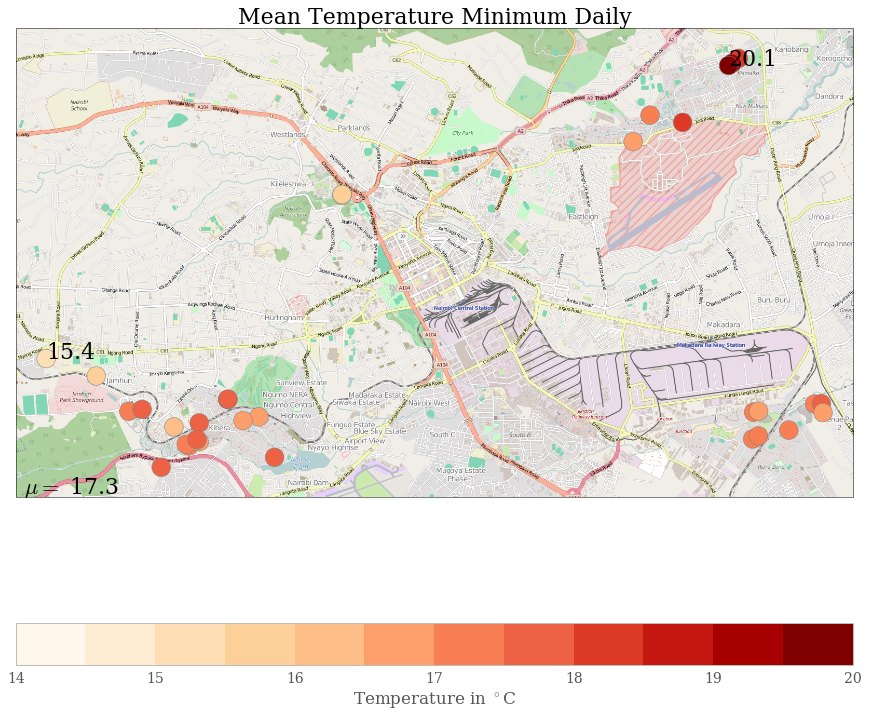

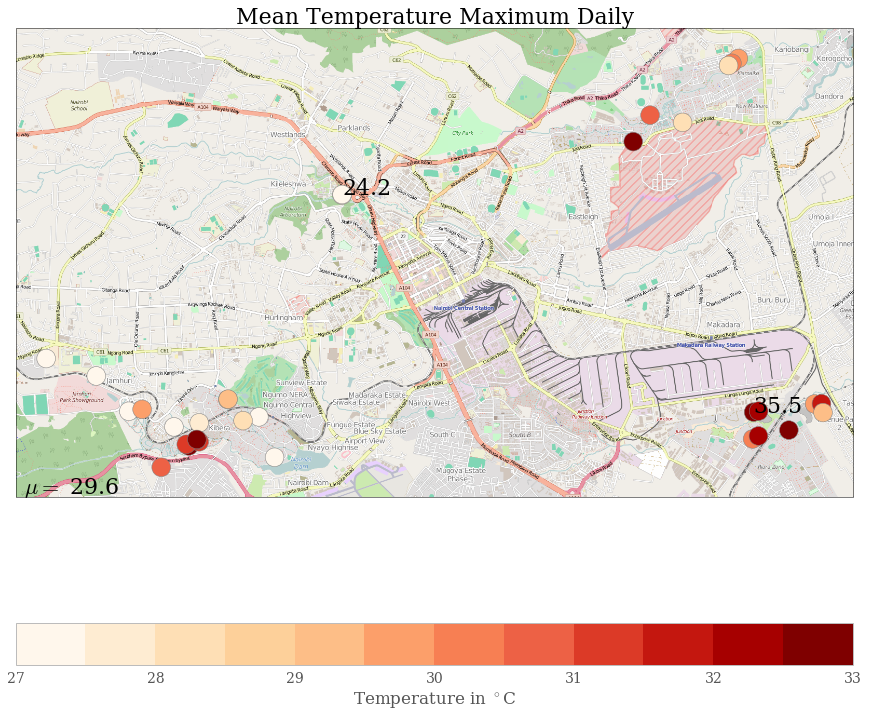

In [102]:
# Figure 1
# temperature, heat index, minimum daily 
spatialfunctions.mapmean(tempDF[startdate:enddate].resample('D').min(), meta, name = 'Minimum Daily')
spatialfunctions.mapmean(tempDF[startdate:enddate].resample('D').max(), meta, name = 'Maximum Daily')
# plot heat index
#spatialfunctions.mapmean(hi.resample('D').min(), meta, ', Minimum Daily HI', option = 'Heat Index')
#spatialfunctions.mapmean(hi.resample('D').max(), meta, ', Maximum Daily HI', option = 'Heat Index')

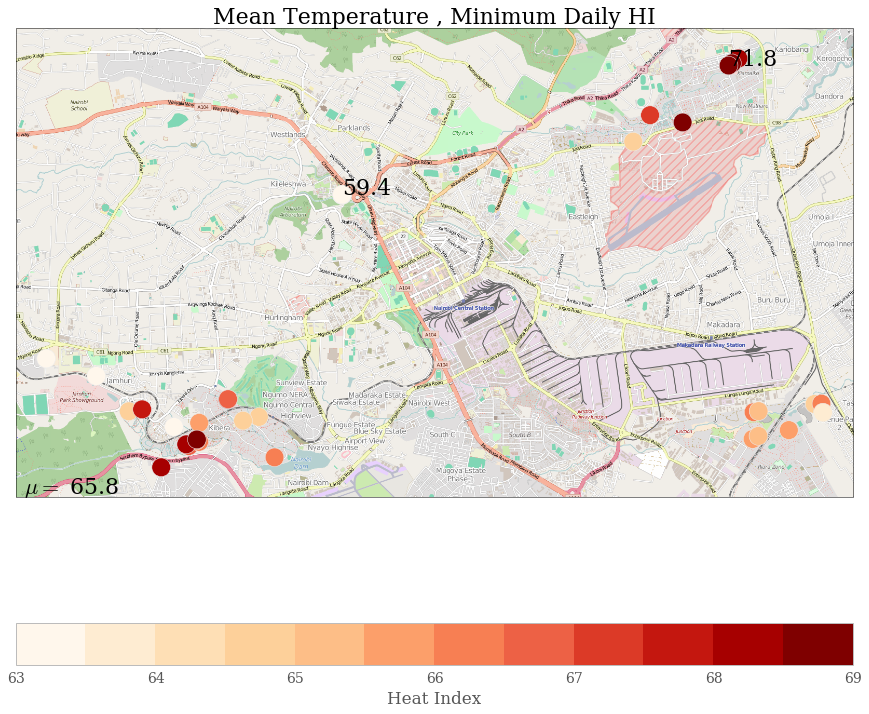

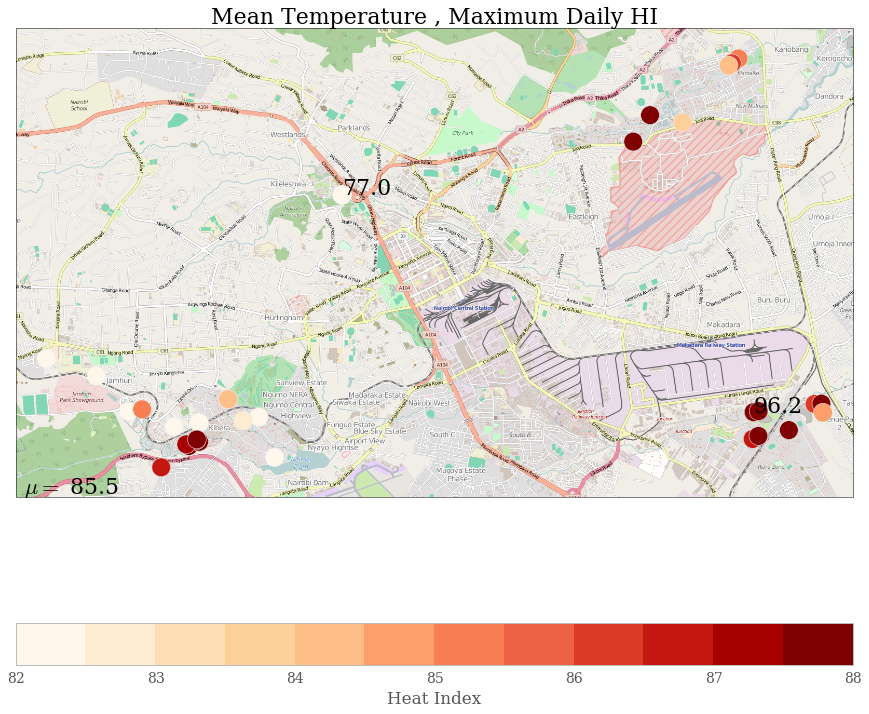

In [85]:
# plot heat index
spatialfunctions.mapmean(hi.resample('D').min(), meta, ', Minimum Daily HI', option = 'Heat Index')
spatialfunctions.mapmean(hi.resample('D').max(), meta, ', Maximum Daily HI', option = 'Heat Index')

In [5]:
import ulmo
# ulmo.ncdc.ghcn_daily.get_stations(country = 'KE') # search for kenya stations
NairobiData = ulmo.ncdc.ghcn_daily.get_data('KEM00063741', as_dataframe=True, update = False) #dagoretti
AirportData = ulmo.ncdc.ghcn_daily.get_data('KE000063740', as_dataframe=True, update = False) #airport
tmin = NairobiData['TMIN']['value'].astype(float)*.1
tmin_airport = AirportData['TMIN']['value'].astype(float)*.1

/Users/annascott2/git/ulmo-gottscott/ulmo/ncdc/ghcn_daily/core.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)
/Users/annascott2/git/ulmo-gottscott/ulmo/ncdc/ghcn_daily/core.py:95: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  daily_index = element_df.resample('D').index.copy()


In [92]:
p95min = np.load('data/Kenyatta1980_2015percentile95_min.npy')
climKenymin = np.load('data/Kenyatta1980_2015climatology_min.npy')

p95mean = np.load('data/Kenyatta1980_2015percentile95_mean.npy')
climKenymean = np.load('data/Kenyatta1980_2015climatology_mean.npy')

p95max = np.load('data/Kenyatta1980_2015percentile95_max.npy')
climKenymax = np.load('data/Kenyatta1980_2015climatology_max.npy')

In [417]:
pylab.rcParams['figure.figsize'] = 5,4

In [370]:
error_6z = tempDF[10][tempDF.index.hour==9].resample('D').mean().subtract(obs['Tn 0600z'])
error_12z = tempDF[10][tempDF.index.hour==15].resample('D').mean().subtract(obs['Tn 1200z'])
min_error = (tempDF[10].resample('D').min().subtract(obs['TMIN']))
max_error = (tempDF[10].resample('D').max().subtract(obs['TMAX']))

print('Min error : ', min_error.mean())
print('Max error : ', max_error.mean())
print('9 am error : ',error_6z[~np.isnan(error_6z)].mean() )
print('15 pm error : ', error_12z[~np.isnan(error_12z)].mean())

('Min error : ', 0.1639135802469139)
('Max error : ', 3.2347499999999996)
('9 am error : ', 0.8625749999999996)
('15 pm error : ', 1.798960784313725)


In [373]:
error_6z = rhDF[10][rhDF.index.hour==9].resample('D').mean().subtract(obs['RH %0600Z'])
error_12z = rhDF[10][rhDF.index.hour==15].resample('D').mean().subtract(obs['RH% 1200Z'])
print('9 am RH error : ',error_6z[~np.isnan(error_6z)].mean() )
print('15 pm RH error : ', error_12z[~np.isnan(error_12z)].mean())

print('9 am RH error std. dev.  : ',error_6z[~np.isnan(error_6z)].std() )
print('15 pm RH error std. dev. : ', error_12z[~np.isnan(error_12z)].std())

('9 am RH error : ', 1.8914125000000002)
('15 pm RH error : ', -0.7124313725490203)
('9 am RH error std. dev.  : ', 4.085481310268182)
('15 pm RH error std. dev. : ', 2.749134396532131)


('Min error : ', 0.1639135802469139)
('Max error : ', 3.2347499999999996)
('9 am error : ', 0.8625749999999996)
('15 pm error : ', 1.798960784313725)
('9 am RH error : ', 1.8914125000000002)
('15 pm RH error : ', -0.7124313725490203)
('9 am RH error std. dev.  : ', 4.085481310268182)
('15 pm RH error std. dev. : ', 2.749134396532131)


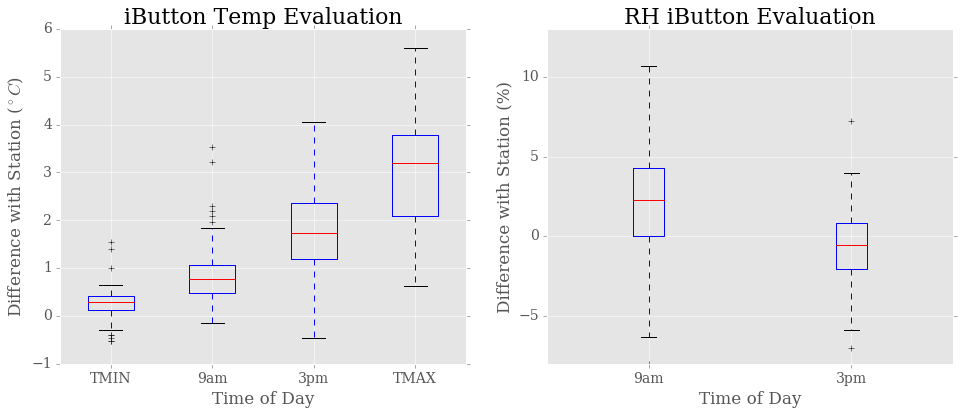

In [521]:
# Figure 2 
# Measurement validation 
error_6z = tempDF[10][tempDF.index.hour==9].resample('D').mean()[startdate:enddate].subtract(obs['Tn 0600z'])
error_12z = tempDF[10][tempDF.index.hour==15].resample('D').mean()[startdate:enddate].subtract(obs['Tn 1200z'])
min_error = (tempDF[10].resample('D').min()[startdate:enddate].subtract(obs['TMIN']))
max_error = (tempDF[10].resample('D').max()[startdate:enddate].subtract(obs['TMAX']))

fig = plt.figure(figsize = [16,6])
ax = fig.add_subplot(121)
handle =plt.boxplot([min_error[~np.isnan(min_error)],
                    error_6z[~np.isnan(error_6z)],
                     error_12z[~np.isnan(error_12z)], 
                    max_error[~np.isnan(max_error)]],
            positions = [1,2,3,4])
ax.set_xticklabels(['TMIN','9am', '3pm', 'TMAX'])
plt.xlabel('Time of Day')
plt.ylabel('Difference with Station ($^\circ C$)')
plt.ylim([-1,6])
plt.title('iButton Temp Evaluation')
#plt.savefig('plots/tempevaluation.pdf')

error_6z = rhDF[10][rhDF.index.hour==9][startdate:enddate].resample('D').mean().subtract(obs['RH %0600Z'])
error_12z = rhDF[10][rhDF.index.hour==15][startdate:enddate].resample('D').mean().subtract(obs['RH% 1200Z'])

# plt.figure()
# ax = plt.axes()
ax = fig.add_subplot(122)

handle =plt.boxplot([error_6z[~np.isnan(error_6z)],
                     error_12z[~np.isnan(error_12z)]], 
            positions = [1, 2])
ax.set_xticklabels(['9am','3pm'])
plt.ylim([-8,13])
plt.xlabel('Time of Day')
plt.ylabel('Difference with Station (%)')
plt.title('RH iButton Evaluation')
plt.savefig('plots/tempRHevaluation.pdf')


##### reported statistics
# temp
error_6z = tempDF[10][tempDF.index.hour==9].resample('D').mean().subtract(obs['Tn 0600z'])
error_12z = tempDF[10][tempDF.index.hour==15].resample('D').mean().subtract(obs['Tn 1200z'])
min_error = (tempDF[10].resample('D').min().subtract(obs['TMIN']))
max_error = (tempDF[10].resample('D').max().subtract(obs['TMAX']))

print('Min error : ', min_error.mean())
print('Max error : ', max_error.mean())
print('9 am error : ',error_6z[~np.isnan(error_6z)].mean() )
print('15 pm error : ', error_12z[~np.isnan(error_12z)].mean())

# RH
error_6z = rhDF[10][rhDF.index.hour==9].resample('D').mean().subtract(obs['RH %0600Z'])
error_12z = rhDF[10][rhDF.index.hour==15].resample('D').mean().subtract(obs['RH% 1200Z'])
print('9 am RH error : ',error_6z[~np.isnan(error_6z)].mean() )
print('15 pm RH error : ', error_12z[~np.isnan(error_12z)].mean())

print('9 am RH error std. dev.  : ',error_6z[~np.isnan(error_6z)].std() )
print('15 pm RH error std. dev. : ', error_12z[~np.isnan(error_12z)].std())

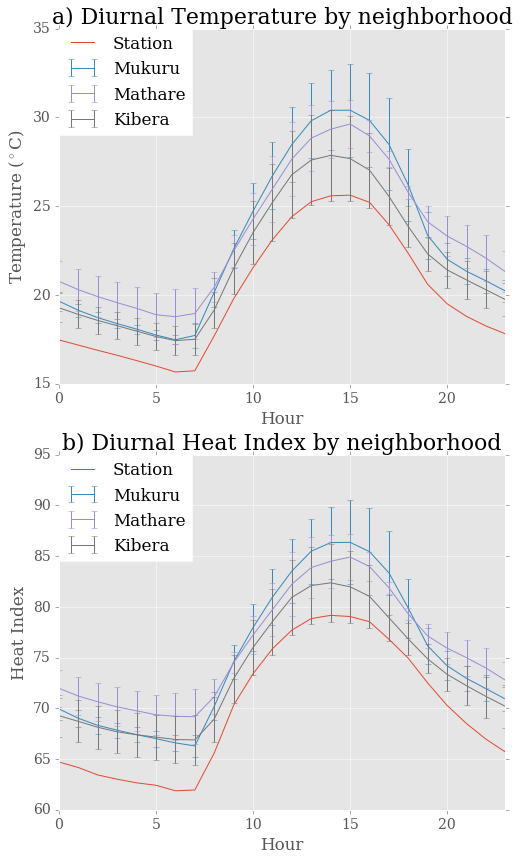

In [523]:
# How does temperature differ within informal settlements?
# mean temperature over the course of a day
# error bars represent standard deviation of sensor-to-sensor variability within the neighborhood
fig = plt.figure(figsize = [8, 14])

MukuruCleaned =[1,2,17,50, 37, 22,38,43] # throw out 36 since it's too high, 
KiberaCleaned = [10,32,3,21,35,11,20,29,8,25,31,9,13,23,26,16,12] # sensor 30 inside a house, 46 also inside
MathareCleaned = [44,40,48,45, 24,4] # has one metal sensor (40) in shade but looks pretty good so I left it in
chiromoCleaned = [18, 27]#
neighborhoods = MukuruCleaned + KiberaCleaned + Mathare

ax = fig.add_subplot(211)
tempDF[10].groupby(tempDF.index.hour).mean().plot()
tempDF[MukuruCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot(yerr = tempDF[MukuruCleaned].groupby(tempDF.index.hour).mean().std(axis=1))
tempDF[Mathare].groupby(tempDF.index.hour).mean().mean(axis=1).plot(yerr = tempDF[Mathare].groupby(tempDF.index.hour).mean().std(axis=1))
tempDF[KiberaCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot(yerr = tempDF[KiberaCleaned].groupby(tempDF.index.hour).mean().std(axis=1), )
#tempDF[chiromoCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot(yerr = tempDF[chiromoCleaned].groupby(tempDF.index.hour).mean().std(axis=1))

plt.legend(['Station', 'Mukuru','Mathare', 'Kibera', 'Chiromo Campus'], 
           #bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
            loc=2, borderaxespad=0., ncol =1).get_frame().set_facecolor('white')

plt.title('a) Diurnal Temperature by neighborhood')
plt.xlabel('Hour')
plt.ylabel('Temperature ($^\circ$C)')
#prettify_plot()

#plt.figure(figsize = [8,5])
ax = fig.add_subplot(212)
hi[10].groupby(hi.index.hour).mean().plot()
hi[MukuruCleaned].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr  = hi[MukuruCleaned].groupby(hi.index.hour).mean().std(axis=1))
hi[Mathare].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr    = hi[Mathare].groupby(hi.index.hour).mean().std(axis=1))
hi[KiberaCleaned].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr  = hi[KiberaCleaned].groupby(hi.index.hour).mean().std(axis=1) )
#hi[chiromoCleaned].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr = hi[chiromoCleaned].groupby(hi.index.hour).mean().std(axis=1))
#plt.legend(['Met Station', 'Mukuru','Mathare', 'Kibera', 'Chiromo Campus'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.legend(['Station', 'Mukuru','Mathare', 'Kibera'], 
           #bbox_to_anchor=(1.05, 1), 
           loc=2, borderaxespad=0., ncol =1).get_frame().set_facecolor('white')
plt.title('b) Diurnal Heat Index by neighborhood')
plt.xlabel('Hour')
plt.ylabel('Heat Index')
#prettify_plot()

plt.savefig('plots/diurnal.pdf')

plt.figure() 
rhDF[10].groupby(rhDF.index.hour).mean().plot()
rhDF[MukuruCleaned].groupby(rhDF.index.hour).mean().mean(axis=1).plot(yerr  = rhDF[MukuruCleaned].groupby(rhDF.index.hour).mean().std(axis=1))
rhDF[Mathare].groupby(rhDF.index.hour).mean().mean(axis=1).plot(yerr    = rhDF[Mathare].groupby(rhDF.index.hour).mean().std(axis=1))
rhDF[KiberaCleaned].groupby(rhDF.index.hour).mean().mean(axis=1).plot(yerr  = hi[KiberaCleaned].groupby(rhDF.index.hour).mean().std(axis=1) )
#hi[chiromoCleaned].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr = hi[chiromoCleaned].groupby(hi.index.hour).mean().std(axis=1))
#plt.legend(['Met Station', 'Mukuru','Mathare', 'Kibera', 'Chiromo Campus'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.legend(['Station', 'Mukuru','Mathare', 'Kibera'], 
           #bbox_to_anchor=(1.05, 1), 
           loc=2, borderaxespad=0., ncol =1).get_frame().set_facecolor('white')
plt.title('b) Diurnal Heat Index by neighborhood')
plt.xlabel('Hour')
plt.ylabel('Heat Index')

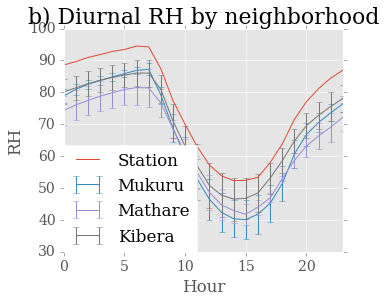

In [609]:
plt.figure() 
rhDF[10].groupby(rhDF.index.hour).mean().plot()
rhDF[MukuruCleaned].groupby(rhDF.index.hour).mean().mean(axis=1).plot(yerr  = rhDF[MukuruCleaned].groupby(rhDF.index.hour).mean().std(axis=1))
rhDF[Mathare].groupby(rhDF.index.hour).mean().mean(axis=1).plot(yerr    = rhDF[Mathare].groupby(rhDF.index.hour).mean().std(axis=1))
rhDF[KiberaCleaned].groupby(rhDF.index.hour).mean().mean(axis=1).plot(yerr  = rhDF[KiberaCleaned].groupby(rhDF.index.hour).mean().std(axis=1) )
#hi[chiromoCleaned].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr = hi[chiromoCleaned].groupby(hi.index.hour).mean().std(axis=1))
#plt.legend(['Met Station', 'Mukuru','Mathare', 'Kibera', 'Chiromo Campus'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.legend(['Station', 'Mukuru','Mathare', 'Kibera'], 
           #bbox_to_anchor=(1.05, 1), 
           loc=3, borderaxespad=0., ncol =1).get_frame().set_facecolor('white')
plt.title('b) Diurnal RH by neighborhood')
plt.xlabel('Hour')
plt.ylabel('RH')

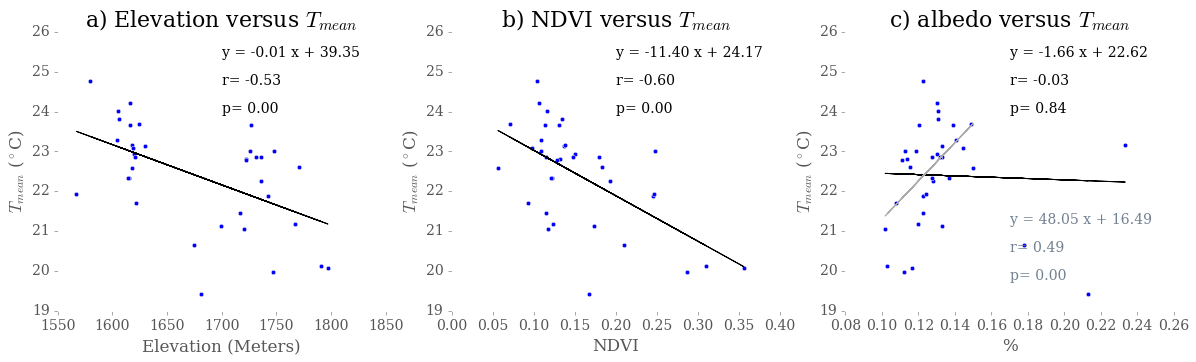

In [602]:
# Relate these changes to surface properties such as satellite-derived albedo and NDVI for min, max, mean

#first, calculate surface properties. These are now saved out as SurfacePropertiesNairobi.csv
# sys.path.append('../Bmore/')
# import spatialfunctions
# lon = meta['location:Longitude'].values
# lat = meta['location:Latitude'].values

# # mount 
# rasterfile = '/Users/annascott2/mountpoint/cityheat/Nairobi/data/LC81680612015053LGN00_B10.TIF'#'../satellite/data/atm_cor_10_LC80150332015229.tif'
# #rasterfile = 'data/LC81680612015053LGN00_B10.TIF'#'../satellite/data/atm_cor_10_LC80150332015229.tif'
# band10 = spatialfunctions.extract_raster_values(lon,lat, rasterfile)
# LST = spatialfunctions.band10_toLST(band10)

# #path = '../../satellite/data/BaltimoreLandsatSummer2015/L8 OLI_TIRS/LC80150332015229LGN00/'
# path = '/Users/annascott2/mountpoint/cityheat/satellite/data/Nairobi/L8OLI_TIRS/LC81680612015053LGN00/'
# B = np.zeros((5,lon.shape[0]))
# for i in (1,2,3,4,5): 
#     file = path+ 'LC81680612015053LGN00_B'+'%s'%i +'.TIF'
#     DN = spatialfunctions.extract_raster_values(lon,lat,file)
#     # convert from digital number to toa reflectance  using : rho*\lambda = REFLECTANCE_MULT_BAND_x*DN +REFLECTANCE_ADD_BAND_x
#     reflectance_mult_band = 2.000e-5
#     reflectance_add_band  = -0.100000
#     B[i-1, :] = reflectance_mult_band*DN+reflectance_add_band

# alb = spatialfunctions.albedo(B[0,:], B[1,:], B[2,:], B[3,:], B[4,:], )
# alb[alb>1] = 'NaN'
# alb[alb<0] = 'NaN'

# NDVI = (B[4,:]-B[3,:]) / (B[4,:]+B[3,:])

# rasterfile = '/Users/annascott2/mountpoint/cityheat/Nairobi/data/s02_e036_1arc_v3.tif'
# #rasterfile = 'data/s02_e036_1arc_v3.tif'

# elevation = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# df = pd.DataFrame({"MaxDailyTemp": tempDF.resample('D').max().mean(),
#                    'MinDailyTemp': tempDF.resample('D').min().mean(), 
#                    'MeanDailyTemp': tempDF.resample('D').mean().mean(), # tempDF.resample('D').min(),
#                    "Elevation": elevation, 
#                    "LST": LST, 
#                     "NDVI": NDVI,
#                    "albedo": alb, 
#                     }).set_index(tempDF.columns)
# df.to_csv('SurfacePropertiesNairobi.csv')

df = pd.read_csv('SurfacePropertiesNairobi.csv').set_index(u'Unnamed: 0')
#df.corr()
import string
units = {'Elevation': 'Elevation (Meters)', 'LST': 'Surface Temp ($^\circ$C)', 'NDVI': 'NDVI', 'albedo': '%'}
minmaxmean = 'mean'
plt.figure(figsize = [25,5])
# i = 1
# # for temp, minmaxmean in zip([tempDF.resample('D').min().mean(), 
# #                              tempDF.resample('D').max().mean(),
# #                              tempDF.resample('D').mean().mean()], ['min', 'max','mean']) :
# temp = tempDF.resample('D').mean().mean()
# minmaxmean = 'mean'
# for surface_property in ['Elevation', 'LST', 'NDVI', 'albedo'] : 
#     plt.subplot(1,4,i)
#     easy_scatter( df[surface_property], temp, 
#                  string.ascii_lowercase[i-1] + ') '+'%s versus %s temp'%(surface_property, minmaxmean),  
#                  units[surface_property], '$^\circ$C')
#     i = i+1

# plt.savefig('plots/surfaceproperties.pdf')
units = {'Elevation': 'Elevation (Meters)', 'LST': 'Surface Temp ($^\circ$C)', 'NDVI': 'NDVI', 'albedo': '%'}
minmaxmean = 'Mean'
plt.figure(figsize = [20,5])

i = 1
temp = tempDF.resample('D').mean().mean()
#, minmaxmean in zip([tempDF.min(), tempDF.max(), tempDF.mean()], ['min', 'max','mean']) :
for surface_property in ['Elevation', 'NDVI', 'albedo'] :
    plt.subplot(1,3,i)
    easy_scatter( df[surface_property], temp, string.ascii_lowercase[i-1] + ') '+ '%s versus $T_{mean}$'%(surface_property),  
                 units[surface_property], '$T_{mean}$ ($^\circ$C)')
    prettify_plot()
    i = i+1

# add albedo info minus outliers
x = df[surface_property].drop(albedo_drop)
y = df['MeanDailyTemp'].drop(albedo_drop)
ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
m,b = np.polyfit(x[ind],y[ind],1)
#r = np.corrcoef(x[ind], y[ind])[0,1]
r,p = scipy.stats.pearsonr(x[ind], y[ind])

plt.subplot(1,3,3)
plt.plot(x, m*x+b, '-', color = 'darkgray', label = 'No Outliers')
plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .3), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom', color = 'slategray')
plt.annotate('r= %.2f'%r, xy=(.5, .2), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom', color = 'slategray')
plt.annotate('p= %.2f'%p, xy=(.5, .1), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom', color = 'slategray')
plt.savefig('plots/surfaceproperties.pdf')

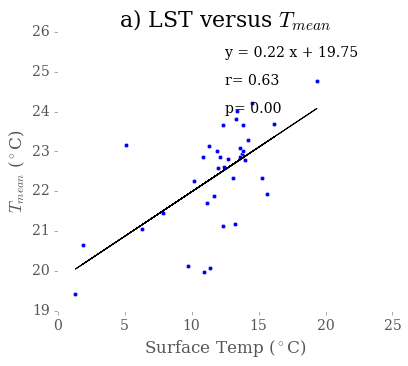

In [606]:
# plot LST
plt.figure(figsize = [6,5])

i = 1
temp = tempDF.resample('D').mean().mean()
#, minmaxmean in zip([tempDF.min(), tempDF.max(), tempDF.mean()], ['min', 'max','mean']) :
for surface_property in ['LST'] :
    easy_scatter( df[surface_property], temp, string.ascii_lowercase[i-1] + ') '+ '%s versus $T_{mean}$'%(surface_property),  
                 units[surface_property], '$T_{mean}$ ($^\circ$C)')
    prettify_plot()
    i = i+1
plt.savefig('plots/LST.pdf')

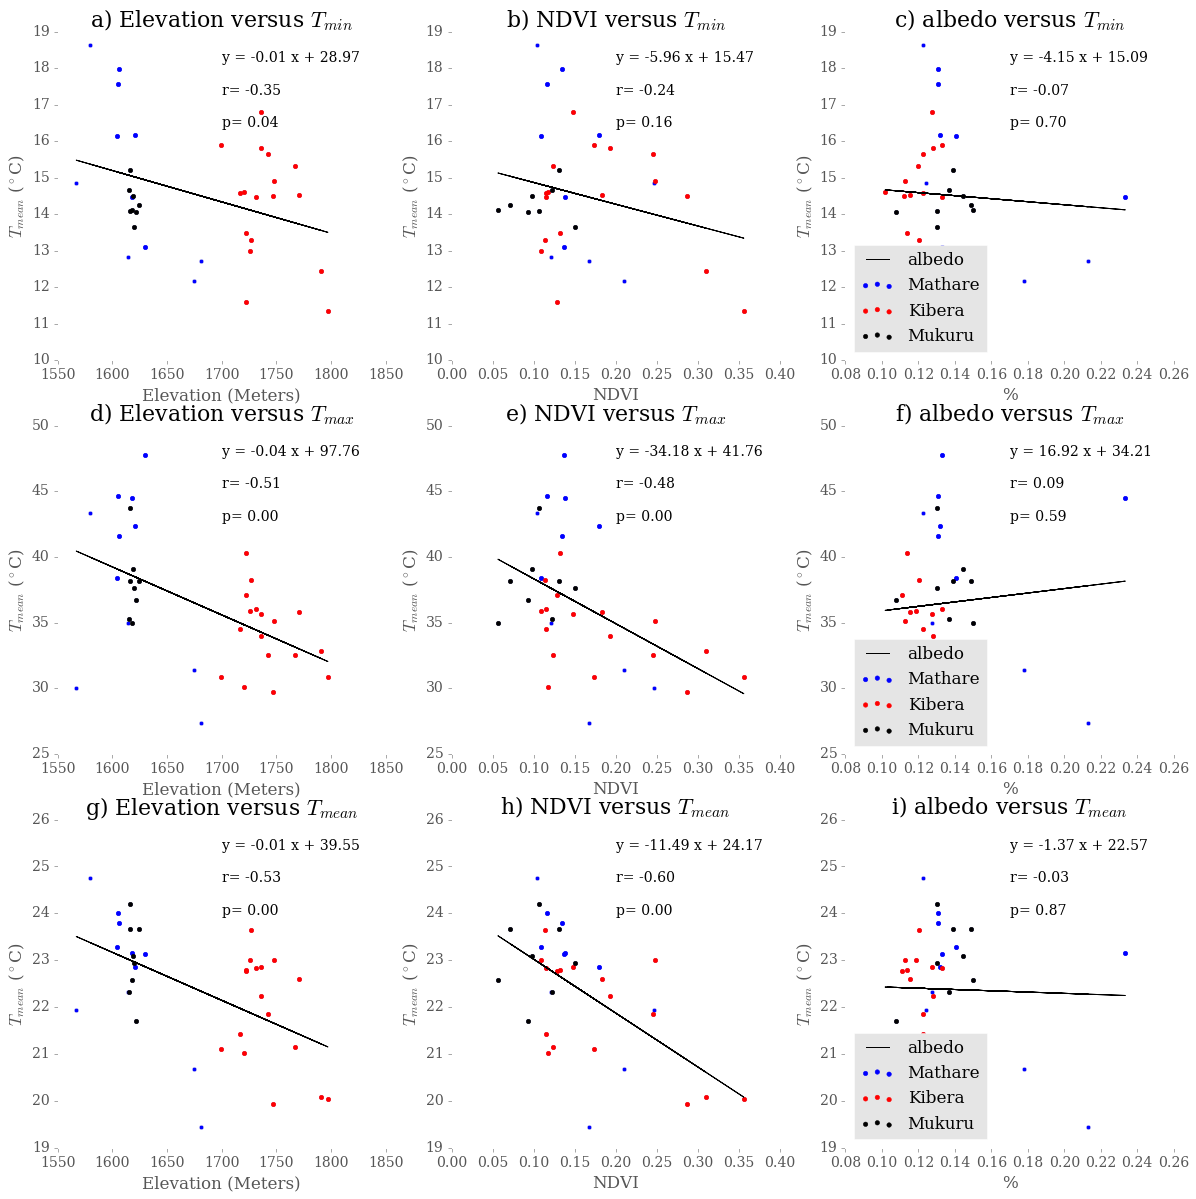

In [627]:
# For kibera 
plt.figure(figsize=[20,20])
i = 1
for temp, minmaxmean in zip([tempDF.min(), tempDF.max(), tempDF.mean()], ['min', 'max','mean']) :
#, minmaxmean in zip([tempDF.min(), tempDF.max(), tempDF.mean()], ['min', 'max','mean']) :
    for surface_property in ['Elevation', 'NDVI', 'albedo'] :
        plt.subplot(3,3,i)
        easy_scatter( df[surface_property], temp, string.ascii_lowercase[i-1] + ') '+ '%s versus $T_{%s}$'%(surface_property,minmaxmean),  
                     units[surface_property], '$T_{mean}$ ($^\circ$C)')
        plt.scatter( df[surface_property][MathareCleaned], temp[MathareCleaned],
                    color = 'blue', label = 'Mathare')
        plt.scatter( df[surface_property][KiberaCleaned], temp[KiberaCleaned],
                    color = 'r', label = 'Kibera')
        plt.scatter( df[surface_property][MukuruCleaned], temp[MukuruCleaned], 
                color = 'black', label = 'Mukuru')
        prettify_plot()
        i = i+1
    plt.legend(loc = 3)

In [630]:
surface_property

'albedo'

In [637]:
print('Mukuru elevation and NDVI :',df['Elevation'][MukuruCleaned].mean(), df['NDVI'][MukuruCleaned].mean())
print('Mathare elevation and NDVI :',df['Elevation'][MathareCleaned].median(), df['NDVI'][MathareCleaned].mean())
print('Kibera elevation and NDVI :',df['Elevation'][KiberaCleaned].mean(), df['NDVI'][KiberaCleaned].mean())

('Mukuru elevation and NDVI :', 1618.75, 0.10371449766575001)
('Mathare elevation and NDVI :', 1612.0, 0.13604425784500002)
('Kibera elevation and NDVI :', 1741.1176470588234, 0.18228121004211761)


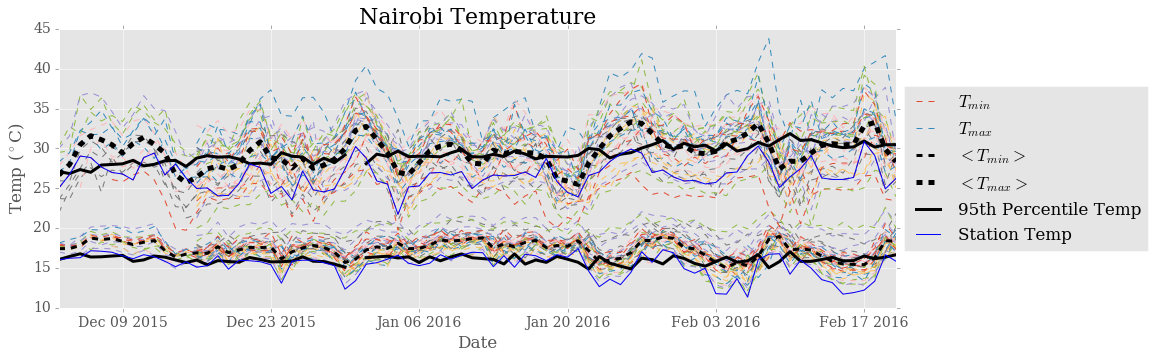

In [552]:
# Plot timeseries
plt.figure(figsize= [15,5])Temperature and humidity data is used to compute the heat index, a bi-quadratic function that estimates heat exposure as:
 \[hi = c_1 +c_2T +c_3RH + c_4TRH +c_5T^2 +c_6RH^2+c_7T^2RH+c_8TRH^2+c_9T^2RH^2 \]
for $c_1 = -42.37, 
c_2 = 2.04901523,
c_3 = 10.14333127, 
c_4 = - 0.22475541, 
c_5 = - 0.00683783, 
c_6 = - 0.05481717, 
c_7 = 0.00122874, 
c8 = 0.00085282, 
c_9 = - 0.00000199$.
Heat index is a unitless quantity but can be understood as human-perceived temperature in degrees Fahrenheit. 
plt.plot(tempDF[startdate:enddate].resample('D').min().index, tempDF[startdate:enddate].resample('D').min(),
         '--', label = '$T_{min}$')

plt.plot(tempDF[startdate:enddate].resample('D').max().index, tempDF[startdate:enddate].resample('D').max(),
         '--', label = '$T_{max}$')

plt.plot(tempDF[startdate:enddate].resample('D').min().index, tempDF[startdate:enddate].resample('D').min().mean(axis=1),
         '--',
         color='k', linewidth = 3, label = '$< T_{min}> $')
plt.plot(tempDF[startdate:enddate].resample('D').max().index, tempDF[startdate:enddate].resample('D').max().mean(axis=1),
         '--',color='k', linewidth = 5, label = '$< T_{max}> $')

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         p95min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         label = '95th Percentile Temp', color = 'k', linewidth = 3)

# plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
#          p95mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
#         '-.', label = '95th Percentile Temp', color = 'red', linewidth = 5)

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         p95max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear], 
         label = '95th Percentile Temp', color = 'k', linewidth = 3)

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
        tempDF[startdate:enddate][10].resample('D').max(),
         label = 'Station Temp', color = 'blue')

plt.plot(tempDF[startdate:enddate].resample('D').min().index, 
        tempDF[startdate:enddate][10].resample('D').min(),
        #'.', 
         label = 'Station Temp', color = 'blue')

plt.title('Nairobi Temperature')
plt.ylabel('Temp ($^\circ$C)')
plt.xlabel('Date')

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('plots/timeseries.pdf')

In [527]:
tempDF[startdate:enddate].resample('D').mean().mean(axis=1).std()

1.05090621444665

In [528]:
tempDF[startdate:enddate].resample('D').min().mean(axis=1).std()

1.0129505834530286

In [529]:
tempDF[startdate:enddate].resample('D').max().mean(axis=1).std()

1.8748077086696981

In [535]:
#hot_days =
tempDF[startdate:enddate].resample('D').mean().loc[hot_temp[hot_temp > 0].index].mean(axis=0).std()

1.299206326119741

In [534]:
tempDF[startdate:enddate].resample('D').mean().mean(axis=0).std()

1.2252730607968354

In [549]:
startdate

'2015-12-04'

In [550]:
startdate = '2015-12-03'

In [551]:
hot_temp = ( tempDF[startdate:enddate].resample('D').mean()[10]- p95mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds mean threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds mean threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = ( tempDF[startdate:enddate].resample('D').min()[10]- p95min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds min threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds min threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = ( tempDF[startdate:enddate].resample('D').max()[10]- p95max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds max threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds max threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

('Percent of days where station exceeds mean threshold: ', 0.0875)
('Total days where station exceeds mean threshold', 7)
('Total days : ', 80)
('Percent of days where station exceeds min threshold: ', 0.3375)
('Total days where station exceeds min threshold', 27)
('Total days : ', 80)
('Percent of days where station exceeds max threshold: ', 0.0875)
('Total days where station exceeds max threshold', 7)
('Total days : ', 80)


In [346]:
# If we increase the 95th percentile by 2 degrees to account for differences, 
hot_temp = ( tempDF[startdate:enddate].resample('D').mean().mean(axis=1)- (p95mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear]+2))
print('Percent of days exceeding mean threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days exceeding mean threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = tempDF[startdate:enddate].resample('D').min().mean(axis=1) - (p95min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear]+2)
print('Percent of days exceeding min threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days exceeding min threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = tempDF[startdate:enddate].resample('D').max().mean(axis=1) - (p95max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear]+2)
print('Percent of days exceeding max threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days exceeding max threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

('Percent of days exceeding mean threshold: ', 0.125)
('Total days exceeding mean threshold', 10)
('Total days : ', 80)
('Percent of days exceeding min threshold: ', 0.275)
('Total days exceeding min threshold', 22)
('Total days : ', 80)
('Percent of days exceeding max threshold: ', 0.1875)
('Total days exceeding max threshold', 15)
('Total days : ', 80)


In [201]:
#diff.drop(10, axis=1, inplace = False)
data = diff.loc[selected][parksensors].drop(10, axis=1, inplace = False).values
data = data[~np.isnan(data)] 
n,bins, patches= ax.hist(data,M, histtype='step', normed = 1,linewidth = 3, color = green,label = 'Green space \n ($\mu = %2.2f$, $\sigma = %2.2f$)'%(data.mean(), data.std()))


In [236]:
diff_hot.dropna().values.mean()

-0.78255445906432652

In [237]:
diff_not_hot.dropna().values.mean()

-0.2054319196428574

In [348]:
hot_temp = ( tempDF[startdate:enddate].resample('D').mean().mean(axis=1)- p95mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
selected = hot_temp[hot_temp>0].index
not_hot_selected = hot_temp[hot_temp<0].index

# diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').mean().subtract(tempDF[10][startdate:enddate].resample('D').mean().values
# ,  axis=0)
diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].subtract(tempDF[10][startdate:enddate]
,  axis=0).resample('D').mean()

from scipy import stats
stats.ttest_ind(diff.loc[selected].dropna().values.flatten(), 
                diff.loc[not_hot_selected].dropna().values.flatten(), equal_var = False)

Ttest_indResult(statistic=3.8496786355234791, pvalue=0.00012158665613398362)

In [349]:
print('On hot days, mean daily station difference is : ', diff.loc[selected].dropna().values.mean())
print('For other days, mean daily station difference is : ', diff.loc[not_hot_selected].dropna().values.mean())

('On hot days, mean daily station difference is : ', 2.3604509027777776)
('For other days, mean daily station difference is : ', 2.1190491092777322)


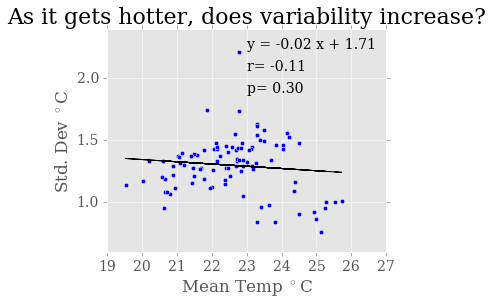

In [536]:
easy_scatter(tempDF.resample('D').mean().mean(axis=1), 
             tempDF.resample('D').mean().std(axis=1),
             'As it gets hotter, does variability increase?', 
             'Mean Temp $^\circ $C', 'Std. Dev $^\circ $C')

In [353]:
diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').mean().subtract(tempDF[10][startdate:enddate].resample('D').mean().values
,  axis=0)
diff.max().max()

6.9576666666666611

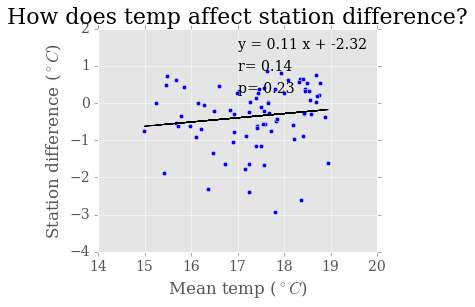

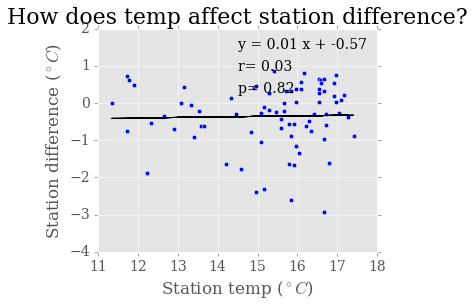

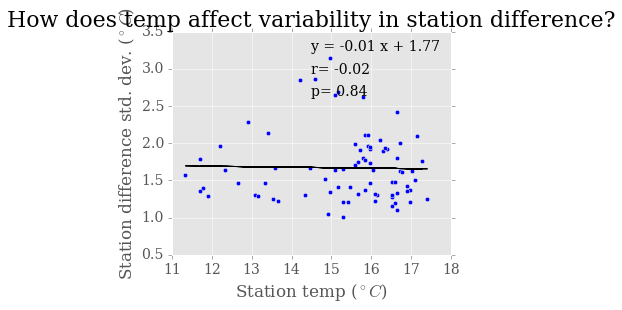

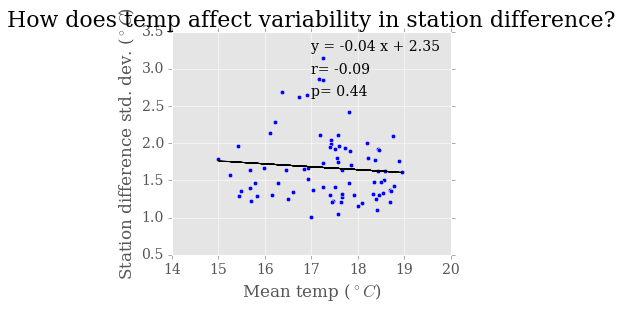

In [537]:
diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].subtract(tempDF[10][startdate:enddate]
,  axis=0).resample('D').min()

easy_scatter(tempDF[startdate:enddate].resample('D').min().mean(axis=1), 
             diff[startdate:enddate].mean(axis=1), 'How does temp affect station difference?', 
             'Mean temp ($^\circ C$)', 'Station difference ($^\circ C$)')
plt.figure()
easy_scatter(tempDF[startdate:enddate].resample('D').min()[10],  
             diff[startdate:enddate].mean(axis=1), 'How does temp affect station difference?', 
             'Station temp ($^\circ C$)', 'Station difference ($^\circ C$)')

plt.figure()
easy_scatter(tempDF[startdate:enddate].resample('D').min()[10],  
             diff[startdate:enddate].std(axis=1), 'How does temp affect variability in station difference?', 
             'Station temp ($^\circ C$)', 'Station difference std. dev. ($^\circ C$)')

plt.figure()
easy_scatter(tempDF[startdate:enddate].resample('D').min().mean(axis=1), 
             diff[startdate:enddate].std(axis=1), 'How does temp affect variability in station difference?', 
             'Mean temp ($^\circ C$)', 'Station difference std. dev. ($^\circ C$)')



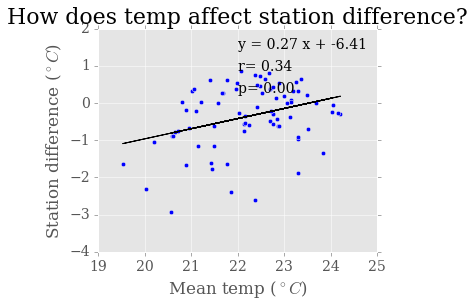

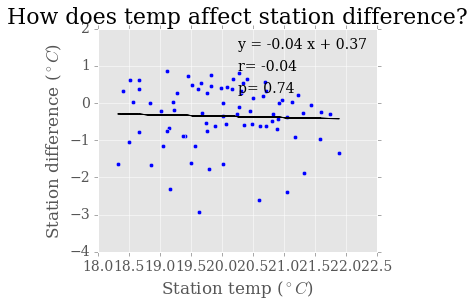

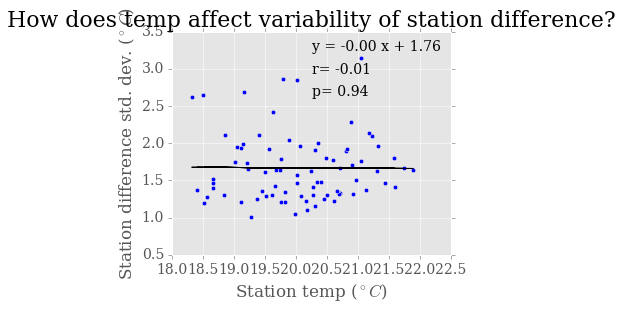

In [538]:
easy_scatter(tempDF[startdate:enddate].resample('D').mean().mean(axis=1), 
             diff[startdate:enddate].mean(axis=1), 'How does temp affect station difference?', 
             'Mean temp ($^\circ C$)', 'Station difference ($^\circ C$)')
plt.figure()
easy_scatter(tempDF[startdate:enddate].resample('D').mean()[10],  
             diff[startdate:enddate].mean(axis=1), 'How does temp affect station difference?', 
             'Station temp ($^\circ C$)', 'Station difference ($^\circ C$)')
plt.figure()
easy_scatter(tempDF[startdate:enddate].resample('D').mean()[10],  
             diff[startdate:enddate].std(axis=1), 'How does temp affect variability of station difference?', 
             'Station temp ($^\circ C$)', 'Station difference std. dev. ($^\circ C$)')

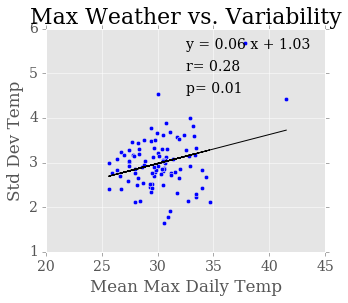

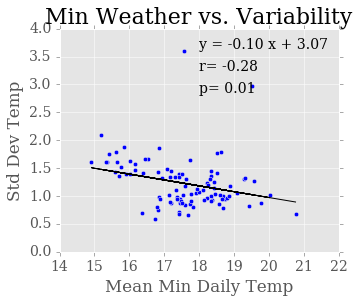

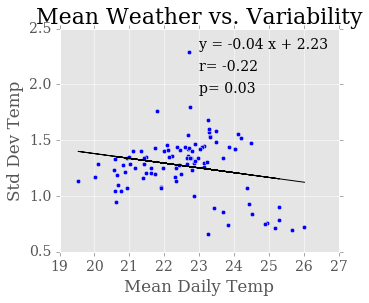

In [293]:
easy_scatter(tempDF.resample('D').max().mean(axis=1), 
            tempDF.resample('D').max().std(axis=1), 
             'Max Weather vs. Variability', 'Mean Max Daily Temp', 'Std Dev Temp')

plt.figure()

easy_scatter(tempDF.resample('D').min().mean(axis=1), 
            tempDF.resample('D').min().std(axis=1), 
             'Min Weather vs. Variability', 'Mean Min Daily Temp', 'Std Dev Temp')

plt.figure()

easy_scatter(tempDF.resample('D').mean().mean(axis=1), 
            tempDF.resample('D').mean().std(axis=1), 
             'Mean Weather vs. Variability', 'Mean Daily Temp', 'Std Dev Temp')

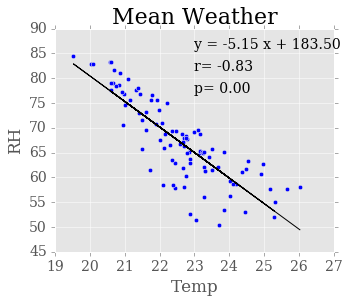

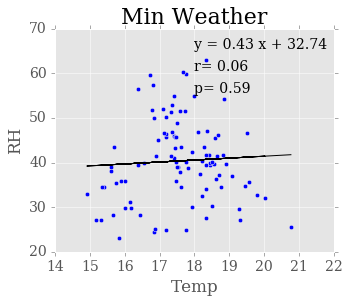

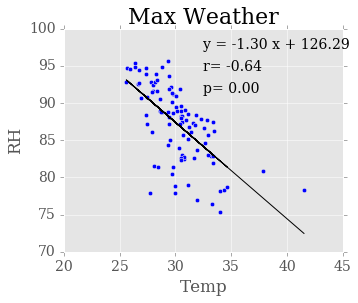

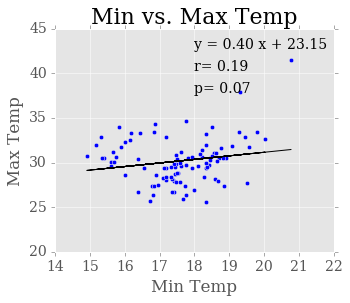

In [150]:
easy_scatter(tempDF.resample('D').mean().mean(axis=1), rhDF.resample('D').mean().mean(axis=1), 
            'Mean Weather', 'Temp', 'RH')
plt.figure()
easy_scatter(tempDF.resample('D').min().mean(axis=1), rhDF.resample('D').min().mean(axis=1), 
            'Min Weather', 'Temp', 'RH')
plt.figure()
easy_scatter(tempDF.resample('D').max().mean(axis=1), rhDF.resample('D').max().mean(axis=1), 
            'Max Weather', 'Temp', 'RH')

plt.figure()
easy_scatter(tempDF.resample('D').min().mean(axis=1), 
             tempDF.resample('D').max().mean(axis=1), 
            'Min vs. Max Temp', 'Min Temp', 'Max Temp')

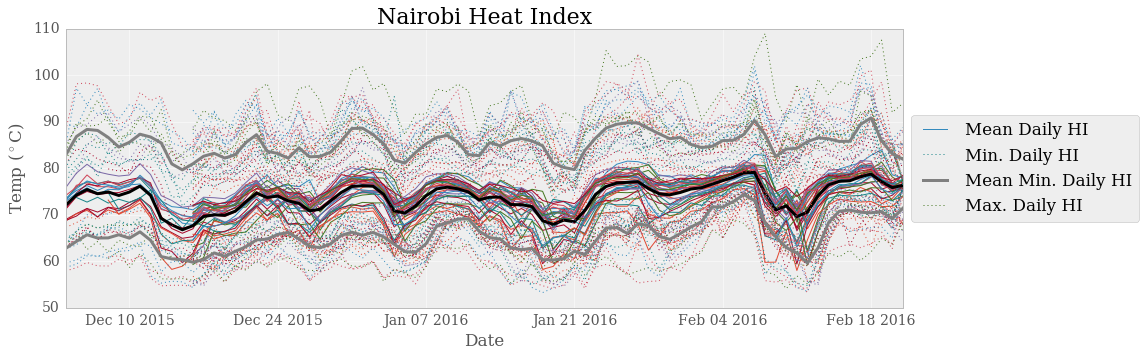

In [20]:
plt.figure(figsize= [15,5])
plt.plot(hi[startdate:enddate].resample('D').mean().index, hi[startdate:enddate].resample('D').mean(), label = 'Mean Daily HI')
plt.plot(hi[startdate:enddate].resample('D').mean().index, hi[startdate:enddate].resample('D').mean().mean(axis=1), 'k', linewidth = 3)

plt.plot(hi[startdate:enddate].resample('D').min().index, hi[startdate:enddate].resample('D').min(),':', label = 'Min. Daily HI')
plt.plot(hi[startdate:enddate].resample('D').min().index, hi[startdate:enddate].resample('D').min().mean(axis=1),'gray', linewidth = 3, label = 'Mean Min. Daily HI')

plt.plot(hi[startdate:enddate].resample('D').max().index, hi[startdate:enddate].resample('D').max(),':', label = 'Max. Daily HI')
plt.plot(hi[startdate:enddate].resample('D').max().index, hi[startdate:enddate].resample('D').max().mean(axis=1),'gray', linewidth = 3)

#plt.fill_between(hiDF[startdate:enddate].index, 18,20, color = 'gray', alpha = .5, label = 'Health Threshold')
#plt.fill_between(18,20)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
#          ncol=3,)
plt.title('Nairobi Heat Index')
plt.ylabel('Temp ($^\circ$C)')
plt.xlabel('Date')

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels, loc='center left', bbox_to_anchor=(1, 0.5))

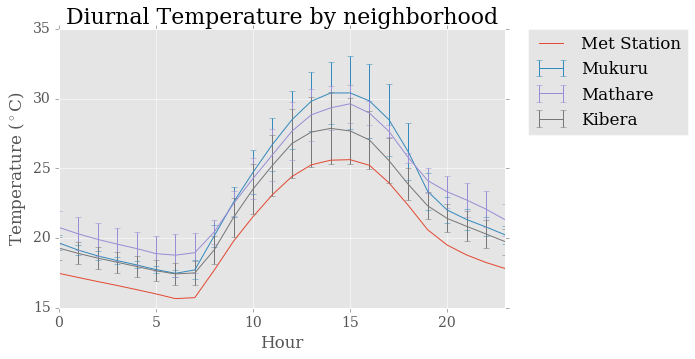

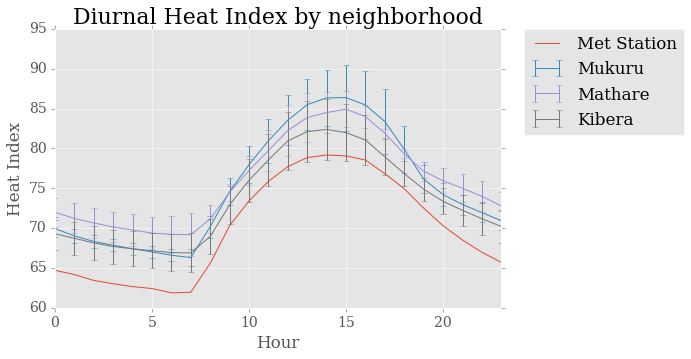

In [386]:
# How does temperature differ within informal settlements?
# mean temperature over the course of a day
# error bars represent standard deviation of sensor-to-sensor variability within the neighborhood
plt.figure(figsize = [8,5])
MukuruCleaned =[1,2,17,50, 37, 22,38,43] # throw out 36 since it's too high, 
KiberaCleaned = [10,32,3,21,35,11,20,29,8,25,31,9,13,23,26,16,12] # sensor 30 inside a house, 46 also inside
chiromoCleaned = [18, 27]
Mathare = [44,40,48,45, 24,4]# 15, 28, 47 not there
neighborhoods = MukuruCleaned + KiberaCleaned + Mathare

tempDF[10].groupby(tempDF.index.hour).mean().plot()
tempDF[MukuruCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot(yerr = tempDF[MukuruCleaned].groupby(tempDF.index.hour).mean().std(axis=1))
tempDF[Mathare].groupby(tempDF.index.hour).mean().mean(axis=1).plot(yerr = tempDF[Mathare].groupby(tempDF.index.hour).mean().std(axis=1))
tempDF[KiberaCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot(yerr = tempDF[KiberaCleaned].groupby(tempDF.index.hour).mean().std(axis=1), )
#tempDF[chiromoCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot(yerr = tempDF[chiromoCleaned].groupby(tempDF.index.hour).mean().std(axis=1))

plt.legend(['Met Station', 'Mukuru','Mathare', 'Kibera', 'Chiromo Campus'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Diurnal Temperature by neighborhood')
plt.xlabel('Hour')
plt.ylabel('Temperature ($^\circ$C)')

plt.figure(figsize = [8,5])
hi[10].groupby(hi.index.hour).mean().plot()
hi[MukuruCleaned].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr  = hi[MukuruCleaned].groupby(hi.index.hour).mean().std(axis=1))
hi[Mathare].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr    = hi[Mathare].groupby(hi.index.hour).mean().std(axis=1))
hi[KiberaCleaned].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr  = hi[KiberaCleaned].groupby(hi.index.hour).mean().std(axis=1) )
#hi[chiromoCleaned].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr = hi[chiromoCleaned].groupby(hi.index.hour).mean().std(axis=1))
#plt.legend(['Met Station', 'Mukuru','Mathare', 'Kibera', 'Chiromo Campus'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.legend(['Met Station', 'Mukuru','Mathare', 'Kibera'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Diurnal Heat Index by neighborhood')
plt.xlabel('Hour')
plt.ylabel('Heat Index')

In [390]:
print('Minimum temp at: ', 
      tempDF[10].groupby(tempDF.index.hour).mean().argmin())
print('Maximum temp at: ', 
      tempDF[10].groupby(tempDF.index.hour).mean().argmax())


('Minimum temp at: ', 6)
('Maximum temp at: ', 15)


In [399]:
neighborhoods = MukuruCleaned + KiberaCleaned + Mathare
tempDF[startdate:enddate][neighborhoods].groupby(tempDF[startdate:enddate].index.hour).mean().mean(axis=1).subtract(tempDF[10].groupby(tempDF.index.hour).mean())

0     2.097896
1     1.976547
2     1.903376
3     1.873914
4     1.859539
5     1.837211
6     1.962788
7     2.039820
8     1.914885
9     2.165193
10    2.377738
11    2.546744
12    2.878168
13    3.057045
14    3.070854
15    2.978509
16    2.712054
17    2.568628
18    2.274819
19    2.163437
20    2.293528
21    2.418312
22    2.409768
23    2.263676
dtype: float64

In [401]:
tempDF[startdate:enddate][neighborhoods].groupby(tempDF[startdate:enddate].index.hour).mean().mean(axis=1).subtract(tempDF[10].groupby(tempDF.index.hour).mean()).max()

3.0708539440329403

In [406]:
tempDF[Mathare].groupby(tempDF.index.hour).mean().mean(axis=1).subtract(tempDF[10].groupby(tempDF.index.hour).mean())

0     3.295611
1     3.123594
2     3.023179
3     2.962869
4     2.944852
5     2.887854
6     3.114561
7     3.223491
8     2.738763
9     2.690088
10    2.740530
11    2.857924
12    3.247967
13    3.581846
14    3.752288
15    4.006854
16    3.742961
17    3.688766
18    3.426608
19    3.527512
20    3.817368
21    3.941347
22    3.823460
23    3.494922
dtype: float64

In [405]:
tempDF[MukuruCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).subtract(tempDF[10].groupby(tempDF.index.hour).mean()).max()

4.8181917268894914

In [56]:
(80-32)*5/9.

26.666666666666668

In [50]:
meta.loc[[18,27]]

meta:instanceID  sensornumber  \
sensornumber                                                            
18            uuid:7ddc411e-a9c8-4440-bad5-42e5b4e7862d            18   
27            uuid:c18df7f2-ff41-4724-81ec-88686e56aba4            27   

              location:Latitude  location:Longitude  location:Altitude  \
sensornumber                                                             
18                    -1.274113           36.808694             1673.0   
27                    -1.274009           36.808694             1659.0   

              location:Accuracy  direction sunorshade attachment  \
sensornumber                                                       
18                          3.0          0    partial       wood   
27                          6.0          0      shade       tree   

             landcoverclass  \
sensornumber                  
18                    grass   
27                    grass   

                                                        picture  \
sensornumber                                                      
18            https://bmorecoolodk.appspot.com/view/binaryDa...   
27            https://bmorecoolodk.appspot.com/view/binaryDa...   

                                      time  \
sensornumber                                 
18            Tue Dec 08 04:46:24 UTC 2015   
27            Tue Dec 08 04:47:04 UTC 2015   

                                              notes  
sensornumber                                         
18                   Chiromo campus met observatory  
27            At a tree next to observatory Chiromo

In [12]:
# now explain it : relate these changes to surface properties such as satellite-derived albedo and NDVI for min, max, mean

#first, calculate surface properties. These are now saved out as SurfacePropertiesNairobi.csv
# import spatialfunctions
# lon = meta['location:Longitude'].values
# lat = meta['location:Latitude'].values

# rasterfile = 'data/LC81680612015053LGN00_B10.TIF'#'../satellite/data/atm_cor_10_LC80150332015229.tif'
# band10 = spatialfunctions.extract_raster_values(lon,lat, rasterfile)
# LST = spatialfunctions.band10_toLST(band10)

# #path = '../../satellite/data/BaltimoreLandsatSummer2015/L8 OLI_TIRS/LC80150332015229LGN00/'
# path = '../satellite/data/Nairobi/L8OLI_TIRS/LC81680612015053LGN00/'
# B = np.zeros((5,lon.shape[0]))
# for i in (1,2,3,4,5): 
#     file = path+ 'LC81680612015053LGN00_B'+'%s'%i +'.TIF'
#     DN = spatialfunctions.extract_raster_values(lon,lat,file)
#     # convert from digital number to toa reflectance  using : rho*\lambda = REFLECTANCE_MULT_BAND_x*DN +REFLECTANCE_ADD_BAND_x
#     reflectance_mult_band = 2.000e-5
#     reflectance_add_band  = -0.100000
#     B[i-1, :] = reflectance_mult_band*DN+reflectance_add_band

# alb = spatialfunctions.albedo(B[0,:], B[1,:], B[2,:], B[3,:], B[4,:], )
# alb[alb>1] = 'NaN'
# alb[alb<0] = 'NaN'

# NDVI = (B[4,:]-B[3,:]) / (B[4,:]+B[3,:])

# rasterfile = 'data/s02_e036_1arc_v3.tif'
# elevation = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# df = pd.DataFrame({"MaxDailyTemp": tempDF.resample('D').max().mean(),
#                    'MinDailyTemp': tempDF.resample('D').min().mean(), 
#                    'MeanDailyTemp': tempDF.resample('D').mean().mean(), # tempDF.resample('D').min(),
#                    "Elevation": elevation, 
#                    "LST": LST, 
#                     "NDVI": NDVI,
#                    "albedo": alb, 
#                     }).set_index(tempDF.columns)
# df.to_csv('SurfacePropertiesNairobi.csv')

df = pd.read_csv('SurfacePropertiesNairobi.csv').set_index(u'Unnamed: 0')
df.corr()

Elevation       LST  MaxDailyTemp  MeanDailyTemp  MinDailyTemp  \
Elevation       1.000000 -0.149648     -0.470609      -0.541214     -0.374828   
LST            -0.149648  1.000000      0.535921       0.619395      0.441405   
MaxDailyTemp   -0.470609  0.535921      1.000000       0.865381      0.246453   
MeanDailyTemp  -0.541214  0.619395      0.865381       1.000000      0.681124   
MinDailyTemp   -0.374828  0.441405      0.246453       0.681124      1.000000   
NDVI            0.612025 -0.252175     -0.569620      -0.599563     -0.379500   
albedo         -0.430110 -0.554446      0.005214      -0.018388     -0.077023   

                   NDVI    albedo  
Elevation      0.612025 -0.430110  
LST           -0.252175 -0.554446  
MaxDailyTemp  -0.569620  0.005214  
MeanDailyTemp -0.599563 -0.018388  
MinDailyTemp  -0.379500 -0.077023  
NDVI           1.000000 -0.173296  
albedo        -0.173296  1.000000

In [29]:
def easy_scatter(x,y,title, xlabel, ylabel) : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r = np.corrcoef(x[ind], y[ind])[0,1]
    plt.scatter(x,y)
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r= %.2f'%r, xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

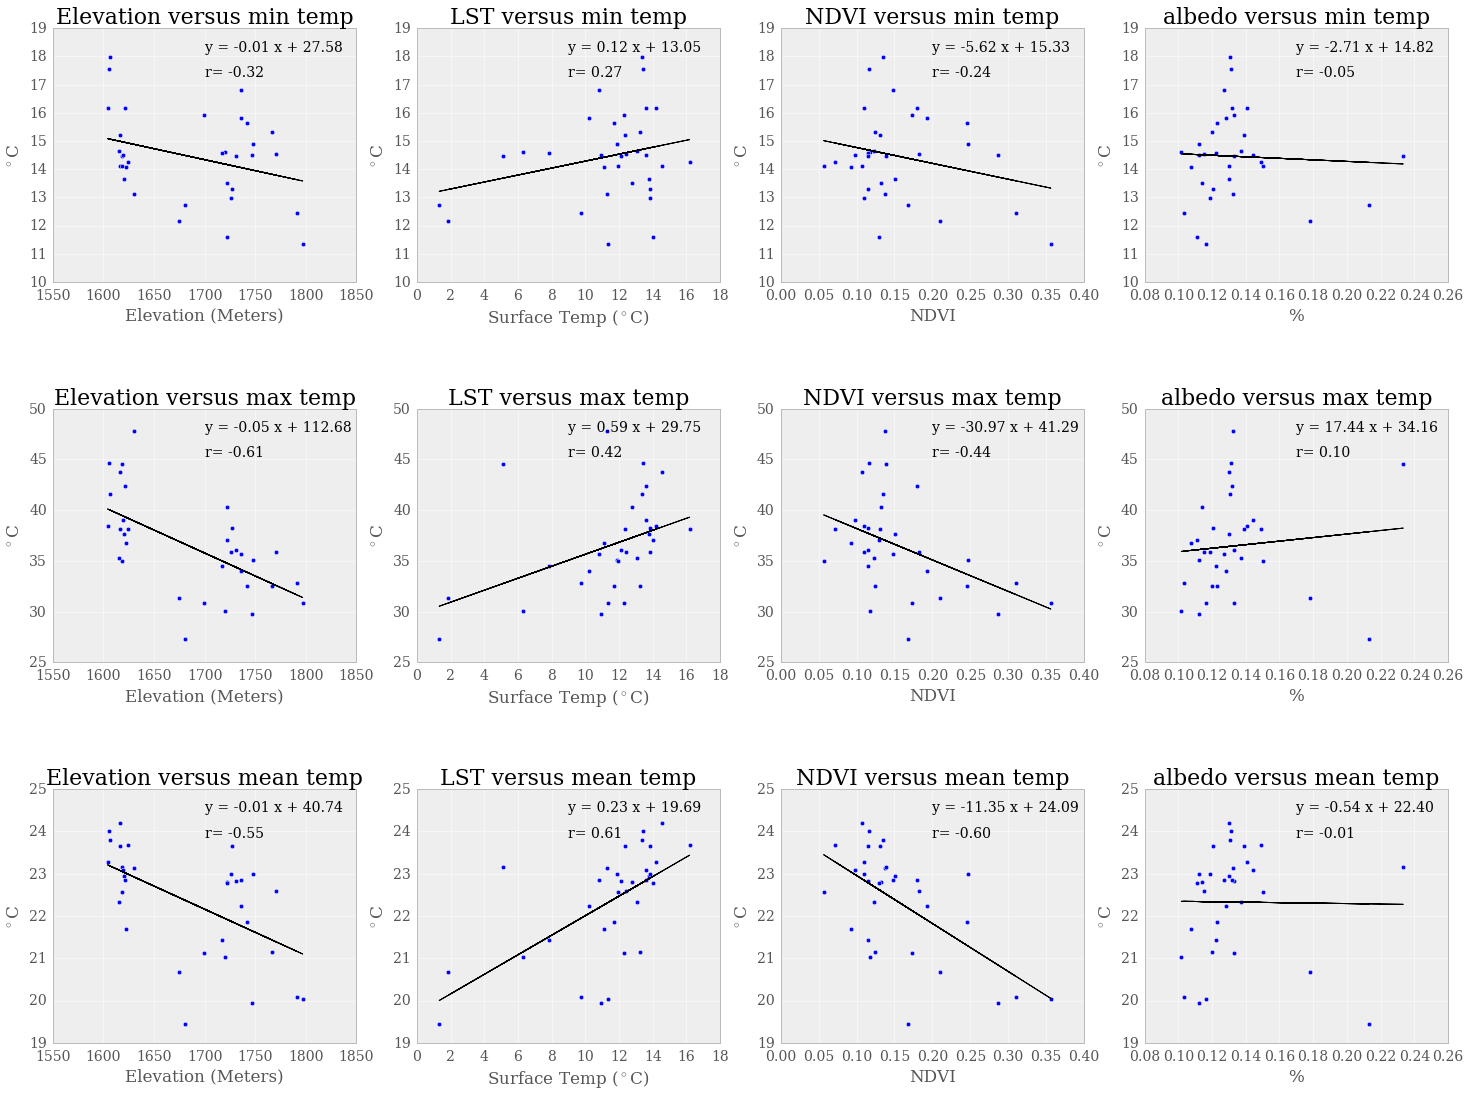

In [30]:
units = {'Elevation': 'Elevation (Meters)', 'LST': 'Surface Temp ($^\circ$C)', 'NDVI': 'NDVI', 'albedo': '%'}
minmaxmean = 'mean'
plt.figure(figsize = [25,25])
i = 1
for temp, minmaxmean in zip([tempDF.min(), tempDF.max(), tempDF.mean()], ['min', 'max','mean']) :

    for surface_property in ['Elevation', 'LST', 'NDVI', 'albedo'] : 
        plt.subplot(4,4,i)
        easy_scatter( df[surface_property], temp, '%s versus %s temp'%(surface_property, minmaxmean),  units[surface_property], '$^\circ$C')
        i = i+1

In [74]:
albedo = df['albedo']

In [75]:
albedo[albedo > .15]

Unnamed: 0
18    0.178127
27    0.213179
48    0.233448
Name: albedo, dtype: float64

In [77]:
meta.loc[albedo[albedo > .15].index]

meta:instanceID  sensornumber  \
Unnamed: 0                                                            
18          uuid:7ddc411e-a9c8-4440-bad5-42e5b4e7862d            18   
27          uuid:c18df7f2-ff41-4724-81ec-88686e56aba4            27   
48          uuid:893a9162-53c1-4600-97e0-b3c6e269b36e            48   

            location:Latitude  location:Longitude  location:Altitude  \
Unnamed: 0                                                             
18                  -1.274113           36.808694             1673.0   
27                  -1.274009           36.808694             1659.0   
48                  -1.260832           36.859868             1645.8   

            location:Accuracy  direction sunorshade attachment landcoverclass  \
Unnamed: 0                                                                      
18                        3.0          0    partial       wood          grass   
27                        6.0          0      shade       tree          grass   
48                        5.0          0    partial       wood     impervious   

                                                      picture  \
Unnamed: 0                                                      
18          https://bmorecoolodk.appspot.com/view/binaryDa...   
27          https://bmorecoolodk.appspot.com/view/binaryDa...   
48          https://bmorecoolodk.appspot.com/view/binaryDa...   

                                    time  \
Unnamed: 0                                 
18          Tue Dec 08 04:46:24 UTC 2015   
27          Tue Dec 08 04:47:04 UTC 2015   
48          Tue Dec 08 09:50:26 UTC 2015   

                                            notes  
Unnamed: 0                                         
18                 Chiromo campus met observatory  
27          At a tree next to observatory Chiromo  
48                            Facing down kwa oti

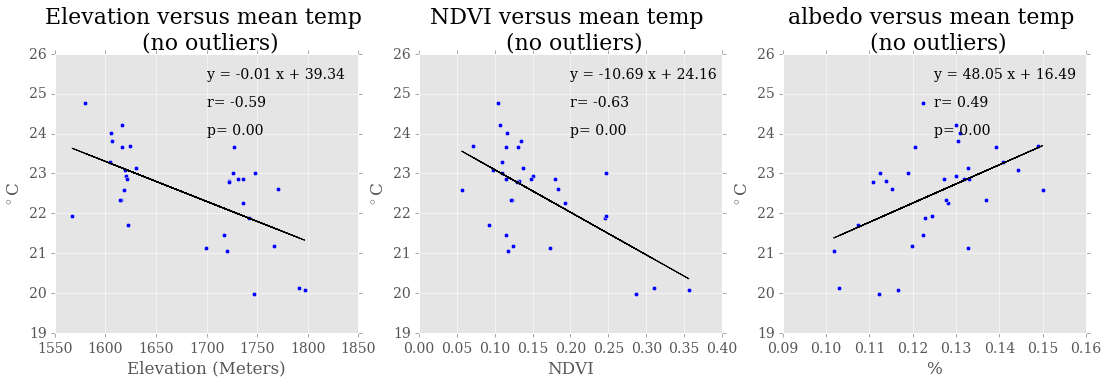

In [559]:
# plot surface variables removing outliers
albedo_drop = [18,27,48]

units = {'Elevation': 'Elevation (Meters)', 'LST': 'Surface Temp ($^\circ$C)', 'NDVI': 'NDVI', 'albedo': '%'}
minmaxmean = 'mean'
plt.figure(figsize = [25,5])

i = 1
temp = tempDF.mean()
#, minmaxmean in zip([tempDF.min(), tempDF.max(), tempDF.mean()], ['min', 'max','mean']) :
for surface_property in ['Elevation', 'NDVI', 'albedo'] :
    plt.subplot(1,4,i)
    easy_scatter( df[surface_property].drop(albedo_drop), df['MeanDailyTemp'].drop(albedo_drop),
                 '%s versus %s temp \n (no outliers)'%(surface_property, minmaxmean),  units[surface_property], '$^\circ$C')
    i = i+1
    
plt.savefig('plots/surfaceproperties_no_outliers.pdf')

In [555]:
import statsmodels.formula.api as sm
inPark = {'grass': 1, 'impervious': 0, 'soil':1, 'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.landcoverclass])
df['InPark'] = parkyesno

result = sm.ols(formula="MeanDailyTemp ~ elevation+ albedo + NDVI + C(InPark)", data=df).fit()
print result.params
print result.summary()

Intercept         39.385844
C(InPark)[T.1]    -0.976360
elevation         -0.008558
albedo            -9.917597
NDVI              -6.113395
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          MeanDailyTemp   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     11.91
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           5.64e-06
Time:                        14:58:04   Log-Likelihood:                -42.899
No. Observations:                  36   AIC:                             95.80
Df Residuals:                      31   BIC:                             103.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>

In [589]:
# note that elevation is pretty co-linear with NDVI, albedo
import statsmodels.formula.api as sm
inPark = {'grass': 1, 'impervious': 0, 'soil':1, 'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.landcoverclass])
df['InPark'] = parkyesno

result = sm.ols(formula="MeanDailyTemp ~albedo + NDVI + C(InPark)", data=df).fit()
print result.params
print result.summary()

Intercept         24.913657
C(InPark)[T.1]    -0.846831
albedo            -4.372366
NDVI             -10.349602
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          MeanDailyTemp   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     9.689
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           0.000106
Time:                        15:48:34   Log-Likelihood:                -48.021
No. Observations:                  36   AIC:                             104.0
Df Residuals:                      32   BIC:                             110.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]


In [68]:
result = sm.ols(formula="MinDailyTemp ~ LST + albedo + NDVI + C(InPark)", data=df).fit()
print result.params
print result.summary()

Intercept         15.917405
C(InPark)[T.1]    -0.377356
LST                0.124439
albedo             4.956106
NDVI              -3.050439
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           MinDailyTemp   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     3.165
Date:                Fri, 05 Aug 2016   Prob (F-statistic):             0.0289
Time:                        17:37:19   Log-Likelihood:                -40.913
No. Observations:                  33   AIC:                             91.83
Df Residuals:                      28   BIC:                             99.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>

In [69]:
result = sm.ols(formula="MaxDailyTemp ~ LST + albedo + NDVI + C(InPark)", data=df).fit()
print result.params
print result.summary()

Intercept         23.370794
C(InPark)[T.1]    -0.758499
LST                0.462599
albedo            27.041957
NDVI             -14.290242
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           MaxDailyTemp   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     8.436
Date:                Fri, 05 Aug 2016   Prob (F-statistic):           0.000135
Time:                        17:37:24   Log-Likelihood:                -67.337
No. Observations:                  33   AIC:                             144.7
Df Residuals:                      28   BIC:                             152.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>

In [92]:
result = sm.ols(formula="MeanDailyTemp ~ elevation +NDVI", data=df).fit()
print result.params
print result.summary()

Intercept    32.950085
elevation    -0.005555
NDVI         -8.056793
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          MeanDailyTemp   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     10.34
Date:                Fri, 05 Aug 2016   Prob (F-statistic):           0.000384
Time:                        18:15:10   Log-Likelihood:                -45.701
No. Observations:                  33   AIC:                             97.40
Df Residuals:                      30   BIC:                             101.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------